In [1]:
import nltk
import nltk.corpus
import numpy as np 
import pandas as pd 
import spacy
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('Emotion_Dataset1.csv')
df

,Emotion,Text
0,joy,Sage Act upgrade list tommorow
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
2,joy,eye true hazel eyeand brilliant Regular feat...
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...
4,fear,Im expecting extremely important phonecall min...
...,...,...
4994,sadness,bet watched soap operas day news cut middle ...
4995,sadness,Bathsheba watching expression closely miserable
4996,anger,stories way grandmother treated mother
4997,joy,friend came tell father invited holiday Benido...


In [3]:

# Define a function to safely tokenize text
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Apply the tokenization function to the 'text' column
df['tokens'] = df['Text'].apply(tokenize_text)
df


,Emotion,Text,tokens
0,joy,Sage Act upgrade list tommorow,"[Sage, Act, upgrade, list, tommorow]"
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE..."
2,joy,eye true hazel eyeand brilliant Regular feat...,"[eye, true, hazel, eyeand, brilliant, Regular,..."
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ..."
4,fear,Im expecting extremely important phonecall min...,"[Im, expecting, extremely, important, phonecal..."
...,...,...,...
4994,sadness,bet watched soap operas day news cut middle ...,"[bet, watched, soap, operas, day, news, cut, m..."
4995,sadness,Bathsheba watching expression closely miserable,"[Bathsheba, watching, expression, closely, mis..."
4996,anger,stories way grandmother treated mother,"[stories, way, grandmother, treated, mother]"
4997,joy,friend came tell father invited holiday Benido...,"[friend, came, tell, father, invited, holiday,..."


In [4]:
# Define a function to apply POS tagging
def pos_tag_tokens(tokens):
    if tokens:
        return pos_tag(tokens)
    else:
        return []

# Apply the POS tagging function to the 'Clean_Text_Tokens' column
df['POS_Tags'] = df['tokens'].apply(pos_tag_tokens)

df['POS_Tags'].head()


0    [(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...
1    [(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...
2    [(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...
3    [(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...
4    [(Im, NNP), (expecting, VBG), (extremely, RB),...
Name: POS_Tags, dtype: object

In [5]:
# Define functions to get type and length of POS_Tags
def get_pos_tags_type(pos_tags):
    return str(type(pos_tags))

def get_pos_tags_length(pos_tags):
    return len(pos_tags)

# Apply functions to create new columns
df['POS_Tags_Type'] = df['POS_Tags'].apply(get_pos_tags_type)
df['POS_Tags_Length'] = df['POS_Tags'].apply(get_pos_tags_length)

# Display the DataFrame to see the new columns
df[['POS_Tags','POS_Tags_Type','POS_Tags_Length']].head()

,POS_Tags,POS_Tags_Type,POS_Tags_Length
0,"[(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...",<class 'list'>,5
1,"[(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...",<class 'list'>,9
2,"[(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...",<class 'list'>,36
3,"[(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...",<class 'list'>,18
4,"[(Im, NNP), (expecting, VBG), (extremely, RB),...",<class 'list'>,10


type(df['POS_Tags']),len(df['POS_Tags'])

In [7]:
#freguency of tokens
from collections import defaultdict
from nltk.probability import FreqDist
fdist=FreqDist()

In [8]:
fdist = defaultdict(int)

# Update frequency distribution from lists of tokens
for token_list in df['tokens']:
    for token in token_list:
        fdist[token] += 1

# Function to calculate token frequencies for a given list of tokens
def get_token_frequencies(token_list):
    frequencies = {token: fdist[token] for token in token_list}
    return frequencies

# Apply the function and create a new column with token frequencies
df['token_frequencies'] = df['tokens'].apply(get_token_frequencies)

# Display the DataFrame
df[['POS_Tags','POS_Tags_Type','POS_Tags_Length','token_frequencies']].head(10)

,POS_Tags,POS_Tags_Type,POS_Tags_Length,token_frequencies
0,"[(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...",<class 'list'>,5,"{'Sage': 1, 'Act': 1, 'upgrade': 1, 'list': 15..."
1,"[(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...",<class 'list'>,9,"{'WAY': 3, 'HOMEGIRL': 1, 'BABY': 2, 'FUNERAL'..."
2,"[(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...",<class 'list'>,36,"{'eye': 9, 'true': 16, 'hazel': 1, 'eyeand': 1..."
3,"[(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...",<class 'list'>,18,"{'ugh': 8, 'babe': 7, 'hugggzzz': 1, 'u': 83, ..."
4,"[(Im, NNP), (expecting, VBG), (extremely, RB),...",<class 'list'>,10,"{'Im': 247, 'expecting': 5, 'extremely': 8, 'i..."
5,"[(Couldnt, NNP), (wait, VBP), (live, JJ), (mis...",<class 'list'>,13,"{'Couldnt': 1, 'wait': 48, 'live': 43, 'missin..."
6,"[(maken, VBN), (Tip, NNP), (2, CD), (:, :), (S...",<class 'list'>,20,"{'maken': 12, 'Tip': 1, '2': 87, ':': 398, 'St..."
7,"[(En, NNP), (dan, NN), (krijg, NN), (je, NN), ...",<class 'list'>,12,"{'En': 6, 'dan': 17, 'krijg': 2, 'je': 22, 'ff..."
8,"[(Drummer, NNP), (Boy, NNP), (bij, NN), (op, N...",<class 'list'>,11,"{'Drummer': 1, 'Boy': 2, 'bij': 4, 'op': 19, '..."
9,"[(bull, NN), (tossed, VBD), (effigy, JJ), (han...",<class 'list'>,5,"{'bull': 1, 'tossed': 1, 'effigy': 1, 'hands':..."


In [9]:
# Initialize frequency distribution dictionary for bigrams
fdist_bigrams = defaultdict(int)

# Generate bigrams and update frequency distribution
for token_list in df['tokens']:
    for i in range(len(token_list) - 1):
        bigram = (token_list[i], token_list[i + 1])
        fdist_bigrams[bigram] += 1

# Function to calculate bigram frequencies for a given list of tokens
def get_bigram_frequencies(token_list):
    bigram_freq = defaultdict(int)
    for i in range(len(token_list) - 1):
        bigram = (token_list[i], token_list[i + 1])
        bigram_freq[bigram] = fdist_bigrams[bigram]
    return bigram_freq

# Apply the function and create a new column with bigram frequencies
df['bigram_frequencies'] = df['tokens'].apply(get_bigram_frequencies)

# Display the DataFrame
df[['tokens','bigram_frequencies']].head(10)

,tokens,bigram_frequencies
0,"[Sage, Act, upgrade, list, tommorow]","{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('..."
1,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):..."
2,"[eye, true, hazel, eyeand, brilliant, Regular,...","{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h..."
3,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ..."
4,"[Im, expecting, extremely, important, phonecal...","{('Im', 'expecting'): 1, ('expecting', 'extrem..."
5,"[Couldnt, wait, live, missing, NH7, wasnt, pai...","{('Couldnt', 'wait'): 1, ('wait', 'live'): 1, ..."
6,"[maken, Tip, 2, :, Stop, op, een, moment, dat,...","{('maken', 'Tip'): 1, ('Tip', '2'): 1, ('2', '..."
7,"[En, dan, krijg, je, ff, een, cadeautje, van, ...","{('En', 'dan'): 1, ('dan', 'krijg'): 1, ('krij..."
8,"[Drummer, Boy, bij, op, verzoek, van, :, welke...","{('Drummer', 'Boy'): 1, ('Boy', 'bij'): 1, ('b..."
9,"[bull, tossed, effigy, hands, infuriated]","{('bull', 'tossed'): 1, ('tossed', 'effigy'): ..."


In [10]:
#list(nltk.trigrams(bstring_token))

# Initialize frequency distribution dictionary for trigrams
fdist_trigrams = defaultdict(int)

# Generate trigrams and update frequency distribution
for token_list in df['tokens']:
    for i in range(len(token_list) - 2):
        trigram = (token_list[i], token_list[i + 1], token_list[i + 2])
        fdist_trigrams[trigram] += 1

# Function to calculate trigram frequencies for a given list of tokens
def get_trigram_frequencies(token_list):
    trigram_freq = defaultdict(int)
    for i in range(len(token_list) - 2):
        trigram = (token_list[i], token_list[i + 1], token_list[i + 2])
        trigram_freq[trigram] = fdist_trigrams[trigram]
    return trigram_freq

# Apply the function and create a new column with trigram frequencies
df['trigram_frequencies'] = df['tokens'].apply(get_trigram_frequencies)

# Display the DataFrame
df[['tokens','bigram_frequencies','trigram_frequencies']].head(10)

,tokens,bigram_frequencies,trigram_frequencies
0,"[Sage, Act, upgrade, list, tommorow]","{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('...","{('Sage', 'Act', 'upgrade'): 1, ('Act', 'upgra..."
1,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):...","{('WAY', 'HOMEGIRL', 'BABY'): 1, ('HOMEGIRL', ..."
2,"[eye, true, hazel, eyeand, brilliant, Regular,...","{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h...","{('eye', 'true', 'hazel'): 1, ('true', 'hazel'..."
3,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ...","{('ugh', 'babe', 'hugggzzz'): 1, ('babe', 'hug..."
4,"[Im, expecting, extremely, important, phonecal...","{('Im', 'expecting'): 1, ('expecting', 'extrem...","{('Im', 'expecting', 'extremely'): 1, ('expect..."
5,"[Couldnt, wait, live, missing, NH7, wasnt, pai...","{('Couldnt', 'wait'): 1, ('wait', 'live'): 1, ...","{('Couldnt', 'wait', 'live'): 1, ('wait', 'liv..."
6,"[maken, Tip, 2, :, Stop, op, een, moment, dat,...","{('maken', 'Tip'): 1, ('Tip', '2'): 1, ('2', '...","{('maken', 'Tip', '2'): 1, ('Tip', '2', ':'): ..."
7,"[En, dan, krijg, je, ff, een, cadeautje, van, ...","{('En', 'dan'): 1, ('dan', 'krijg'): 1, ('krij...","{('En', 'dan', 'krijg'): 1, ('dan', 'krijg', '..."
8,"[Drummer, Boy, bij, op, verzoek, van, :, welke...","{('Drummer', 'Boy'): 1, ('Boy', 'bij'): 1, ('b...","{('Drummer', 'Boy', 'bij'): 1, ('Boy', 'bij', ..."
9,"[bull, tossed, effigy, hands, infuriated]","{('bull', 'tossed'): 1, ('tossed', 'effigy'): ...","{('bull', 'tossed', 'effigy'): 1, ('tossed', '..."


In [11]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams



# Initialize frequency distribution dictionaries
fdist_ngrams = defaultdict(int)

# Function to generate n-grams and update frequency distribution
def update_ngram_frequencies(tokens, n):
    ngram_freq = defaultdict(int)
    for ngram in ngrams(tokens, n):
        ngram_freq[ngram] += 1
    return ngram_freq

# Update frequency distribution for unigrams, bigrams, and trigrams
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Unigram
fdist_ngrams = update_ngram_frequencies(all_tokens, 4)

# Bigram
fdist_bigrams = update_ngram_frequencies(all_tokens, 2)

# Trigram
fdist_trigrams = update_ngram_frequencies(all_tokens, 3)

# Function to calculate n-gram frequencies for a given list of tokens
def get_ngram_frequencies(token_list, ngram_freq_dict):
    ngram_freq = defaultdict(int)
    n_grams = list(ngrams(token_list, len(next(iter(ngram_freq_dict.keys())))))
    for ngram in n_grams:
        ngram_freq[ngram] = ngram_freq_dict[ngram]
    return ngram_freq

# Apply the functions and create new columns with n-gram frequencies

df['bigram_frequencies'] = df['tokens'].apply(lambda tokens: get_ngram_frequencies(tokens, fdist_bigrams))
df['trigram_frequencies'] = df['tokens'].apply(lambda tokens: get_ngram_frequencies(tokens, fdist_trigrams))
df['ngram_frequencies'] = df['tokens'].apply(lambda tokens: get_ngram_frequencies(tokens, fdist_ngrams))

# Display the DataFrame
df[['bigram_frequencies','trigram_frequencies','ngram_frequencies']].head(10)


,bigram_frequencies,trigram_frequencies,ngram_frequencies
0,"{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('...","{('Sage', 'Act', 'upgrade'): 1, ('Act', 'upgra...","{('Sage', 'Act', 'upgrade', 'list'): 1, ('Act'..."
1,"{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):...","{('WAY', 'HOMEGIRL', 'BABY'): 1, ('HOMEGIRL', ...","{('WAY', 'HOMEGIRL', 'BABY', 'FUNERAL'): 1, ('..."
2,"{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h...","{('eye', 'true', 'hazel'): 1, ('true', 'hazel'...","{('eye', 'true', 'hazel', 'eyeand'): 1, ('true..."
3,"{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ...","{('ugh', 'babe', 'hugggzzz'): 1, ('babe', 'hug...","{('ugh', 'babe', 'hugggzzz', 'u'): 1, ('babe',..."
4,"{('Im', 'expecting'): 1, ('expecting', 'extrem...","{('Im', 'expecting', 'extremely'): 1, ('expect...","{('Im', 'expecting', 'extremely', 'important')..."
5,"{('Couldnt', 'wait'): 1, ('wait', 'live'): 1, ...","{('Couldnt', 'wait', 'live'): 1, ('wait', 'liv...","{('Couldnt', 'wait', 'live', 'missing'): 1, ('..."
6,"{('maken', 'Tip'): 1, ('Tip', '2'): 1, ('2', '...","{('maken', 'Tip', '2'): 1, ('Tip', '2', ':'): ...","{('maken', 'Tip', '2', ':'): 1, ('Tip', '2', '..."
7,"{('En', 'dan'): 1, ('dan', 'krijg'): 1, ('krij...","{('En', 'dan', 'krijg'): 1, ('dan', 'krijg', '...","{('En', 'dan', 'krijg', 'je'): 1, ('dan', 'kri..."
8,"{('Drummer', 'Boy'): 1, ('Boy', 'bij'): 1, ('b...","{('Drummer', 'Boy', 'bij'): 1, ('Boy', 'bij', ...","{('Drummer', 'Boy', 'bij', 'op'): 1, ('Boy', '..."
9,"{('bull', 'tossed'): 1, ('tossed', 'effigy'): ...","{('bull', 'tossed', 'effigy'): 1, ('tossed', '...","{('bull', 'tossed', 'effigy', 'hands'): 1, ('t..."


In [12]:
#stemming
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to apply stemming to a list of tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the 'tokens' column
df['stemmed_tokens'] = df['tokens'].apply(stem_tokens)

# Print the DataFrame with 'tokens' and 'stemmed_tokens' columns
df[['tokens', 'stemmed_tokens']].head(10)

,tokens,stemmed_tokens
0,"[Sage, Act, upgrade, list, tommorow]","[sage, act, upgrad, list, tommorow]"
1,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","[way, homegirl, babi, funer, man, hate, funer,..."
2,"[eye, true, hazel, eyeand, brilliant, Regular,...","[eye, true, hazel, eyeand, brilliant, regular,..."
3,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak..."
4,"[Im, expecting, extremely, important, phonecal...","[im, expect, extrem, import, phonecal, minut, ..."
5,"[Couldnt, wait, live, missing, NH7, wasnt, pai...","[couldnt, wait, live, miss, nh7, wasnt, pain, ..."
6,"[maken, Tip, 2, :, Stop, op, een, moment, dat,...","[maken, tip, 2, :, stop, op, een, moment, dat,..."
7,"[En, dan, krijg, je, ff, een, cadeautje, van, ...","[en, dan, krijg, je, ff, een, cadeautj, van, e..."
8,"[Drummer, Boy, bij, op, verzoek, van, :, welke...","[drummer, boy, bij, op, verzoek, van, :, welk,..."
9,"[bull, tossed, effigy, hands, infuriated]","[bull, toss, effigi, hand, infuri]"


In [13]:
stemmer.stem("winning"),stemmer.stem("studies"),stemmer.stem("buying")

('win', 'studi', 'buy')

In [14]:
#lemmatization
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet



# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token.lower()) for token in tokens]

# Apply lemmatization to the 'tokens' column
df['lemmatized_tokens'] = df['stemmed_tokens'].apply(lemmatize_tokens)

# Print the DataFrame with 'tokens' and 'lemmatized_tokens' columns
df[['stemmed_tokens', 'lemmatized_tokens']].head(10)


,stemmed_tokens,lemmatized_tokens
0,"[sage, act, upgrad, list, tommorow]","[sage, act, upgrad, list, tommorow]"
1,"[way, homegirl, babi, funer, man, hate, funer,...","[way, homegirl, babi, funer, man, hate, funer,..."
2,"[eye, true, hazel, eyeand, brilliant, regular,...","[eye, true, hazel, eyeand, brilliant, regular,..."
3,"[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak..."
4,"[im, expect, extrem, import, phonecal, minut, ...","[im, expect, extrem, import, phonecal, minut, ..."
5,"[couldnt, wait, live, miss, nh7, wasnt, pain, ...","[couldnt, wait, live, miss, nh7, wasnt, pain, ..."
6,"[maken, tip, 2, :, stop, op, een, moment, dat,...","[maken, tip, 2, :, stop, op, een, moment, dat,..."
7,"[en, dan, krijg, je, ff, een, cadeautj, van, e...","[en, dan, krijg, je, ff, een, cadeautj, van, e..."
8,"[drummer, boy, bij, op, verzoek, van, :, welk,...","[drummer, boy, bij, op, verzoek, van, :, welk,..."
9,"[bull, toss, effigi, hand, infuri]","[bull, toss, effigi, hand, infuri]"


In [15]:
word_to_stem=["cats","cacti","geese"]

In [16]:
for i in word_to_stem:
    print(i + ":"+ lemmatizer.lemmatize(i))

cats:cat
cacti:cactus
geese:goose


In [17]:
import numpy as np 
import pandas as pd 
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:

df[[ 'Emotion','Text']].head()

,Emotion,Text
0,joy,Sage Act upgrade list tommorow
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
2,joy,eye true hazel eyeand brilliant Regular feat...
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...
4,fear,Im expecting extremely important phonecall min...


In [19]:
df['Emotion'].value_counts()

Emotion
joy         1624
sadness      953
fear         768
anger        624
surprise     585
neutral      294
disgust      128
shame         23
Name: count, dtype: int64

In [20]:
df['sentiment'] = df['Emotion'].map({'joy':1, 'sadness':2, 'fear':3, 'anger':4, 'surprise':5, 'neutral':6,'disgust':7,'shame':8})
df.head()

,Emotion,Text,tokens,POS_Tags,POS_Tags_Type,POS_Tags_Length,token_frequencies,bigram_frequencies,trigram_frequencies,ngram_frequencies,stemmed_tokens,lemmatized_tokens,sentiment
0,joy,Sage Act upgrade list tommorow,"[Sage, Act, upgrade, list, tommorow]","[(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...",<class 'list'>,5,"{'Sage': 1, 'Act': 1, 'upgrade': 1, 'list': 15...","{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('...","{('Sage', 'Act', 'upgrade'): 1, ('Act', 'upgra...","{('Sage', 'Act', 'upgrade', 'list'): 1, ('Act'...","[sage, act, upgrad, list, tommorow]","[sage, act, upgrad, list, tommorow]",1
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","[(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...",<class 'list'>,9,"{'WAY': 3, 'HOMEGIRL': 1, 'BABY': 2, 'FUNERAL'...","{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):...","{('WAY', 'HOMEGIRL', 'BABY'): 1, ('HOMEGIRL', ...","{('WAY', 'HOMEGIRL', 'BABY', 'FUNERAL'): 1, ('...","[way, homegirl, babi, funer, man, hate, funer,...","[way, homegirl, babi, funer, man, hate, funer,...",2
2,joy,eye true hazel eyeand brilliant Regular feat...,"[eye, true, hazel, eyeand, brilliant, Regular,...","[(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...",<class 'list'>,36,"{'eye': 9, 'true': 16, 'hazel': 1, 'eyeand': 1...","{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h...","{('eye', 'true', 'hazel'): 1, ('true', 'hazel'...","{('eye', 'true', 'hazel', 'eyeand'): 1, ('true...","[eye, true, hazel, eyeand, brilliant, regular,...","[eye, true, hazel, eyeand, brilliant, regular,...",1
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","[(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...",<class 'list'>,18,"{'ugh': 8, 'babe': 7, 'hugggzzz': 1, 'u': 83, ...","{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ...","{('ugh', 'babe', 'hugggzzz'): 1, ('babe', 'hug...","{('ugh', 'babe', 'hugggzzz', 'u'): 1, ('babe',...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...",1
4,fear,Im expecting extremely important phonecall min...,"[Im, expecting, extremely, important, phonecal...","[(Im, NNP), (expecting, VBG), (extremely, RB),...",<class 'list'>,10,"{'Im': 247, 'expecting': 5, 'extremely': 8, 'i...","{('Im', 'expecting'): 1, ('expecting', 'extrem...","{('Im', 'expecting', 'extremely'): 1, ('expect...","{('Im', 'expecting', 'extremely', 'important')...","[im, expect, extrem, import, phonecal, minut, ...","[im, expect, extrem, import, phonecal, minut, ...",3


In [21]:
df = df.dropna(subset=['Text'])
df

,Emotion,Text,tokens,POS_Tags,POS_Tags_Type,POS_Tags_Length,token_frequencies,bigram_frequencies,trigram_frequencies,ngram_frequencies,stemmed_tokens,lemmatized_tokens,sentiment
0,joy,Sage Act upgrade list tommorow,"[Sage, Act, upgrade, list, tommorow]","[(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...",<class 'list'>,5,"{'Sage': 1, 'Act': 1, 'upgrade': 1, 'list': 15...","{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('...","{('Sage', 'Act', 'upgrade'): 1, ('Act', 'upgra...","{('Sage', 'Act', 'upgrade', 'list'): 1, ('Act'...","[sage, act, upgrad, list, tommorow]","[sage, act, upgrad, list, tommorow]",1
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","[(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...",<class 'list'>,9,"{'WAY': 3, 'HOMEGIRL': 1, 'BABY': 2, 'FUNERAL'...","{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):...","{('WAY', 'HOMEGIRL', 'BABY'): 1, ('HOMEGIRL', ...","{('WAY', 'HOMEGIRL', 'BABY', 'FUNERAL'): 1, ('...","[way, homegirl, babi, funer, man, hate, funer,...","[way, homegirl, babi, funer, man, hate, funer,...",2
2,joy,eye true hazel eyeand brilliant Regular feat...,"[eye, true, hazel, eyeand, brilliant, Regular,...","[(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...",<class 'list'>,36,"{'eye': 9, 'true': 16, 'hazel': 1, 'eyeand': 1...","{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h...","{('eye', 'true', 'hazel'): 1, ('true', 'hazel'...","{('eye', 'true', 'hazel', 'eyeand'): 1, ('true...","[eye, true, hazel, eyeand, brilliant, regular,...","[eye, true, hazel, eyeand, brilliant, regular,...",1
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","[(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...",<class 'list'>,18,"{'ugh': 8, 'babe': 7, 'hugggzzz': 1, 'u': 83, ...","{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ...","{('ugh', 'babe', 'hugggzzz'): 1, ('babe', 'hug...","{('ugh', 'babe', 'hugggzzz', 'u'): 1, ('babe',...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...",1
4,fear,Im expecting extremely important phonecall min...,"[Im, expecting, extremely, important, phonecal...","[(Im, NNP), (expecting, VBG), (extremely, RB),...",<class 'list'>,10,"{'Im': 247, 'expecting': 5, 'extremely': 8, 'i...","{('Im', 'expecting'): 1, ('expecting', 'extrem...","{('Im', 'expecting', 'extremely'): 1, ('expect...","{('Im', 'expecting', 'extremely', 'important')...","[im, expect, extrem, import, phonecal, minut, ...","[im, expect, extrem, import, phonecal, minut, ...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,sadness,bet watched soap operas day news cut middle ...,"[bet, watched, soap, operas, day, news, cut, m...","[(bet, RB), (watched, VBN), (soap, NN), (opera...",<class 'list'>,11,"{'bet': 7, 'watched': 12, 'soap': 2, 'operas':...","{('bet', 'watched'): 1, ('watched', 'soap'): 1...","{('bet', 'watched', 'soap'): 1, ('watched', 's...","{('bet', 'watched', 'soap', 'operas'): 1, ('wa...","[bet, watch, soap, opera, day, news, cut, midd...","[bet, watch, soap, opera, day, news, cut, midd...",2
4995,sadness,Bathsheba watching expression closely miserable,"[Bathsheba, watching, expression, closely, mis...","[(Bathsheba, NNP), (watching, VBG), (expressio...",<class 'list'>,5,"{'Bathsheba': 2, 'watching': 40, 'expression':...","{('Bathsheba', 'watching'): 2, ('watching', 'e...","{('Bathsheba', 'watching', 'expression'): 2, (...","{('Bathsheba', 'watching', 'expression', 'clos...","[bathsheba, watch, express, close, miser]","[bathsheba, watch, express, close, miser]",2
4996,anger,stories way grandmother treated mother,"[stories, way, grandmother, treated, mother]","[(stories, NNS), (way, NN), (grandmother, RB),...",<class 'list'>,5,"{'stories': 6, 'way': 63, 'grandmother': 13, '...","{('stories', 'way'): 1, ('way', 'grandmother')...","{('stories', 'way', 'grandmother'): 1, ('way',...","{('stories', 'way', 'grandmother', 'treated'):...","[stori, way, gra

In [22]:
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)


In [23]:

df['preprocessed_text'] = df['Text'].apply(preprocess)
df.head()

C:\Users\Anwaar-ul-Karim Shah\AppData\Local\Temp\ipykernel_5076\2857590937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['Text'].apply(preprocess)


,Emotion,Text,tokens,POS_Tags,POS_Tags_Type,POS_Tags_Length,token_frequencies,bigram_frequencies,trigram_frequencies,ngram_frequencies,stemmed_tokens,lemmatized_tokens,sentiment,preprocessed_text
0,joy,Sage Act upgrade list tommorow,"[Sage, Act, upgrade, list, tommorow]","[(Sage, NNP), (Act, NNP), (upgrade, JJ), (list...",<class 'list'>,5,"{'Sage': 1, 'Act': 1, 'upgrade': 1, 'list': 15...","{('Sage', 'Act'): 1, ('Act', 'upgrade'): 1, ('...","{('Sage', 'Act', 'upgrade'): 1, ('Act', 'upgra...","{('Sage', 'Act', 'upgrade', 'list'): 1, ('Act'...","[sage, act, upgrad, list, tommorow]","[sage, act, upgrad, list, tommorow]",1,Sage Act upgrade list tommorow
1,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,"[WAY, HOMEGIRL, BABY, FUNERAL, MAN, HATE, FUNE...","[(WAY, NNP), (HOMEGIRL, NNP), (BABY, NNP), (FU...",<class 'list'>,9,"{'WAY': 3, 'HOMEGIRL': 1, 'BABY': 2, 'FUNERAL'...","{('WAY', 'HOMEGIRL'): 1, ('HOMEGIRL', 'BABY'):...","{('WAY', 'HOMEGIRL', 'BABY'): 1, ('HOMEGIRL', ...","{('WAY', 'HOMEGIRL', 'BABY', 'FUNERAL'): 1, ('...","[way, homegirl, babi, funer, man, hate, funer,...","[way, homegirl, babi, funer, man, hate, funer,...",2,WAY HOMEGIRL BABY FUNERAL man HATE funerals sh...
2,joy,eye true hazel eyeand brilliant Regular feat...,"[eye, true, hazel, eyeand, brilliant, Regular,...","[(eye, NN), (true, JJ), (hazel, NN), (eyeand, ...",<class 'list'>,36,"{'eye': 9, 'true': 16, 'hazel': 1, 'eyeand': 1...","{('eye', 'true'): 1, ('true', 'hazel'): 1, ('h...","{('eye', 'true', 'hazel'): 1, ('true', 'hazel'...","{('eye', 'true', 'hazel', 'eyeand'): 1, ('true...","[eye, true, hazel, eyeand, brilliant, regular,...","[eye, true, hazel, eyeand, brilliant, regular,...",1,eye true hazel eyeand brilliant Regular fe...
3,joy,ugh babe hugggzzz u babe naamazed nga ako e...,"[ugh, babe, hugggzzz, u, babe, naamazed, nga, ...","[(ugh, JJ), (babe, NN), (hugggzzz, NN), (u, JJ...",<class 'list'>,18,"{'ugh': 8, 'babe': 7, 'hugggzzz': 1, 'u': 83, ...","{('ugh', 'babe'): 1, ('babe', 'hugggzzz'): 1, ...","{('ugh', 'babe', 'hugggzzz'): 1, ('babe', 'hug...","{('ugh', 'babe', 'hugggzzz', 'u'): 1, ('babe',...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...","[ugh, babe, hugggzzz, u, babe, naamaz, nga, ak...",1,ugh babe hugggzzz u babe naamaze nga ako ...
4,fear,Im expecting extremely important phonecall min...,"[Im, expecting, extremely, important, phonecal...","[(Im, NNP), (expecting, VBG), (extremely, RB),...",<class 'list'>,10,"{'Im': 247, 'expecting': 5, 'extremely': 8, 'i...","{('Im', 'expecting'): 1, ('expecting', 'extrem...","{('Im', 'expecting', 'extremely'): 1, ('expect...","{('Im', 'expecting', 'extremely', 'important')...","[im, expect, extrem, import, phonecal, minut, ...","[im, expect, extrem, import, phonecal, minut, ...",3,m expect extremely important phonecall minute ...


In [24]:
X = df['preprocessed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='all')
X_sm, y_sm = smote.fit_resample(X_vec, y)

y_sm.value_counts()

sentiment
1    1623
2    1623
3    1623
5    1623
4    1623
8    1623
6    1623
7    1623
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.60      0.63       312
           2       0.76      0.72      0.74       305
           3       0.95      0.78      0.86       335
           4       0.90      0.84      0.87       311
           5       0.95      0.86      0.90       359
           6       0.66      0.98      0.79       338
           7       1.00      0.99      0.99       323
           8       1.00      1.00      1.00       314

    accuracy                           0.85      2597
   macro avg       0.86      0.85      0.85      2597
weighted avg       0.86      0.85      0.85      2597



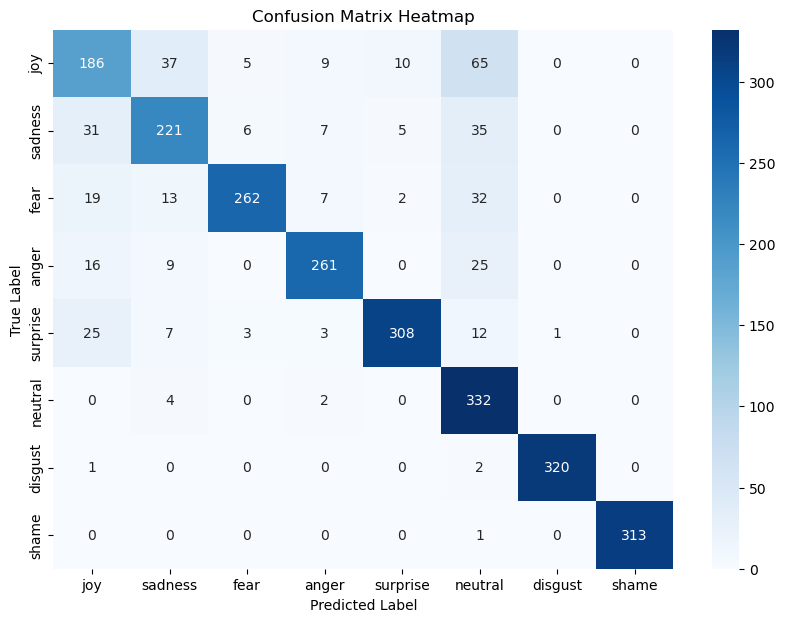

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#            xticklabels=np.unique(y_test), 
#            yticklabels=np.unique(y_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['joy','sadness','fear','anger','surprise','neutral','disgust','shame'], 
            yticklabels=['joy','sadness','fear','anger','surprise','neutral','disgust','shame'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

